# load data

## activity label data

In [5]:
import pandas as pd

def read_act_df(base_dir, time_cols=['Started', 'Finished', 'Updated']):
    """
    Load csv file containing activity data and parse datetime columns.
    Drop rows with NaN in specified time columns.
    Args:
        base_dir (str): Path to the CSV file.
        time_cols (list): List of columns to parse as datetime.
    Returns:
        pd.DataFrame: DataFrame with parsed datetime columns."""
    act_df = pd.read_csv(base_dir)
    act_df = act_df.dropna(subset=time_cols)

    for col in time_cols:
        act_df[col] = pd.to_datetime(act_df[col], format='%Y/%m/%d %H:%M')
        if act_df[col].isna().any():
            raise ValueError(f"Column '{col}' contains NaN or unparseable datetime values.")
        act_df[col] = act_df[col].dt.tz_localize('UTC+09:00')

    return act_df

act_path = '../data/TrainingDataPD25/TrainActivities.csv'
act_df = read_act_df(act_path)
display(act_df.head(10))
print(act_df['Activity Type'].value_counts().index)

,ID,Activity Type ID,Activity Type,Started,Finished,Updated,Subject
0,1130251,2806,1 (FACING camera) Sit and stand,2024-09-02 06:16:00+09:00,2024-09-02 06:16:00+09:00,2024-09-02 06:16:00+09:00,U22
1,1130254,2807,2 (FACING camera) both hands SHAKING (sitting ...,2024-09-02 06:17:00+09:00,2024-09-02 06:17:00+09:00,2024-09-02 06:17:00+09:00,U22
2,1130257,2807,2 (FACING camera) both hands SHAKING (sitting ...,2024-09-02 06:18:00+09:00,2024-09-02 06:18:00+09:00,2024-09-02 06:18:00+09:00,U22
3,1130261,2806,1 (FACING camera) Sit and stand,2024-09-02 06:20:00+09:00,2024-09-02 06:20:00+09:00,2024-09-02 06:20:00+09:00,U22
4,1130292,2806,1 (FACING camera) Sit and stand,2024-09-02 06:42:00+09:00,2024-09-02 06:42:00+09:00,2024-09-02 06:42:00+09:00,U2
5,1130293,2807,2 (FACING camera) both hands SHAKING (sitting ...,2024-09-02 06:42:00+09:00,2024-09-02 06:42:00+09:00,2024-09-02 06:42:00+09:00,U2
6,1130294,2808,3 Stand up from chair - both hands with SHAKING,2024-09-02 06:42:00+09:00,2024-09-02 06:42:00+09:00,2024-09-02 06:42:00+09:00,U2
7,1130306,2806,1 (FACING camera) Sit and stand,2024-09-02 06:44:00+09:00,2024-09-02 06:44:00+09:00,2024-09-02 06:44:00+09:00,U1
8,1136872,2806,1 (FACING camera) Sit and stand,2024-09-03 19:56:00+09:00,2024-09-03 19:56:00+09:00,2024-09-03 19:56:00+09:00,U22
9,1136878,2807,2 (FACING camera) both hands SHAKING (sitting ...,2024-09-03 19:56:00+09:00,2024-09-03 19:57:00+09:00,2024-09-03 19:57:00+09:00,U22


Index(['1 (FACING camera) Sit and stand',
       '2 (FACING camera) both hands SHAKING (sitting position)',
       '3 Stand up from chair - both hands with SHAKING',
       '5 (Sideway) both hands SHAKING (sitting)',
       '6 (Sideway) STAND up with - both hands SHAKING',
       '10 Slow walk (SHAKING hands/body, tiny step, head forward)',
       '4 (Sideway) Sit & stand', '8 Walk (LEFT --> Right --> Left)',
       '9 Walk & STOP/frozen, full body shaking, rotate then return back',
       '7 Cool down - sitting/relax'],
      dtype='object', name='Activity Type')


## acceleration data

In [8]:
import os
import glob

base_dir = '/Users/tptn/MachineLearning/tremor_challenge2/data/TrainingDataPD25/users_timeXYZ/users'
headers = ['id', 'datetime', 'x', 'y', 'z']

def read_users_df(base_dir, headers):
    """
    Load all csv files into one DataFrame.
    Parse datetime and ensure timezone consistency.
    Sort by datetime.
    Args:
        base_dir (str): Base directory containing user data.
        headers (list): List of column names for the DataFrame.
    Returns:
        pd.DataFrame: Concatenated DataFrame with all user data."""
    df_list = [] # to store all csv files
    for id in os.listdir(base_dir):
        path = os.path.join(base_dir, id)

        if os.path.isdir(path):
            files = glob.glob(os.path.join(path, '*.csv'))

            for f in files:
                df = pd.read_csv(f, header=None, names=headers) # load csv
                df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%dT%H:%M:%S.%f%z') # conver to datetime
                tz = df['datetime'].dt.tz # get the timezone
                if tz != 'UTC+09:00':
                    df['datetime'] = df['datetime'].dt.tz_convert('UTC+09:00')
                df_list.append(df)
    users_df = pd.concat(df_list, ignore_index=True)
    users_df.sort_values(by=['datetime'], inplace=True)
    return users_df

if users_df is None:
    users_df = read_users_df(base_dir, headers)
display(users_df.head(10))

,id,datetime,x,y,z
350086,2804,2024-09-02 06:25:07.752000+09:00,1.633,7.777,5.751
350087,2804,2024-09-02 06:25:07.756000+09:00,1.681,8.301,6.079
350088,2804,2024-09-02 06:25:07.760000+09:00,1.506,8.260,5.839
350089,2804,2024-09-02 06:25:07.763000+09:00,1.319,7.978,5.303
350090,2804,2024-09-02 06:25:07.767000+09:00,1.219,7.813,4.819
350091,2804,2024-09-02 06:25:07.828000+09:00,1.302,7.870,4.963
350092,2804,2024-09-02 06:25:07.832000+09:00,1.161,7.908,5.200
350093,2804,2024-09-02 06:25:07.836000+09:00,1.183,7.987,5.401
350094,2804,2024-09-02 06:25:07.840000+09:00,1.271,7.927,5.447
350095,2804,2024-09-02 06:25:07.843000+09:00,1.288,7.896,5.437


In [9]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2045326 entries, 350086 to 264471
Data columns (total 5 columns):
 #   Column    Dtype                    
---  ------    -----                    
 0   id        int64                    
 1   datetime  datetime64[ns, UTC+09:00]
 2   x         float64                  
 3   y         float64                  
 4   z         float64                  
dtypes: datetime64[ns, UTC+09:00](1), float64(3), int64(1)
memory usage: 93.6 MB


In [12]:
users_df.isnull().any()

id          False
datetime    False
x           False
y           False
z           False
dtype: bool

In [13]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 341
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype                    
---  ------            --------------  -----                    
 0   ID                275 non-null    int64                    
 1   Activity Type ID  275 non-null    int64                    
 2   Activity Type     275 non-null    object                   
 3   Started           275 non-null    datetime64[ns, UTC+09:00]
 4   Finished          275 non-null    datetime64[ns, UTC+09:00]
 5   Updated           275 non-null    datetime64[ns, UTC+09:00]
 6   Subject           275 non-null    object                   
dtypes: datetime64[ns, UTC+09:00](3), int64(2), object(2)
memory usage: 17.2+ KB


In [14]:
act_df.isnull().any()

ID                  False
Activity Type ID    False
Activity Type       False
Started             False
Finished            False
Updated             False
Subject             False
dtype: bool

# Clean data

## accelerometer data

In [16]:
users_df.duplicated().any()

np.False_

## activity label data

In [19]:
# add duration between Started and Finished
def add_duration(act_df):
    act_cp = act_df.copy()
    act_cp['Finished'] = act_cp['Finished'].dt.floor('s') + pd.Timedelta(minutes=1) - pd.Timedelta(microseconds=1)
    return act_cp

act_df_with_duration = add_duration(act_df)

In [35]:
act_df_with_duration.duplicated(subset=['ID']).any()

np.False_

In [39]:
def seg_acc_per_act(acc_df, act_df):
    seg_list=[]
    seg_label_list=[]
    seg_id_list=[]
    seg_subject_list=[]

    for index, row in act_df.iterrows():
        start = row['Started']
        end = row['Finished']

        seg = acc_df[acc_df['datetime'].between(start, end)]
        seg_id = row['ID']
        seg_label = row['Activity Type']
        seg_subject = row['Subject']
        if not seg.empty:
            seg_list.append(seg)
            seg_label_list.append(seg_label)
            seg_id_list.append(seg_id)
            seg_subject_list.append(seg_subject)

    return seg_list, seg_label_list, seg_id_list, seg_subject_list

seg_list, seg_label_list, seg_id_list, seg_subject_list = seg_acc_per_act(users_df, act_df_with_duration)

In [26]:
print(len(seg_list))
print(len(seg_label_list))
print(len(seg_id_list))

271
271
271


In [40]:
import matplotlib.pyplot as plt

def plot_segment(index):
    # Get the segment and label
    segment = seg_list[index]
    label = seg_label_list[index]
    subject = seg_subject_list[index]

    # Assume segment shape is (N, 3) → columns: [x, y, z]
    time = range(segment.shape[0])

    plt.figure(figsize=(10, 5))
    plt.plot(time, segment['x'], label='X-axis')
    plt.plot(time, segment['y'], label='Y-axis')
    plt.plot(time, segment['z'], label='Z-axis')

    plt.title(f'Acceleration Data - Segment {index} ({label}) - Subject: {subject}')
    plt.xlabel('Time (samples)')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True)
    plt.show()


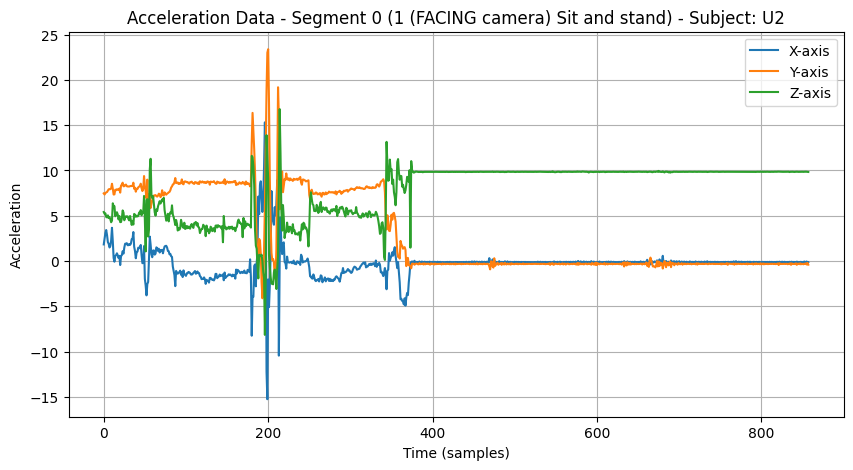

In [41]:
plot_segment(0)

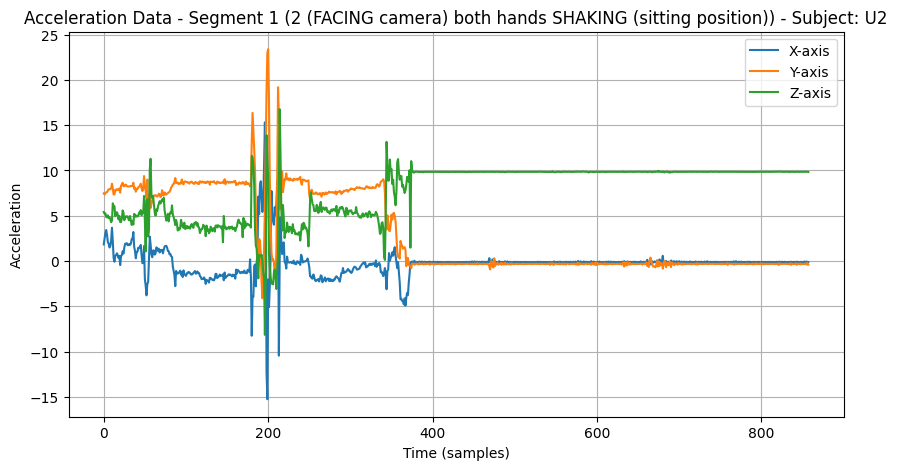

In [42]:
plot_segment(1)

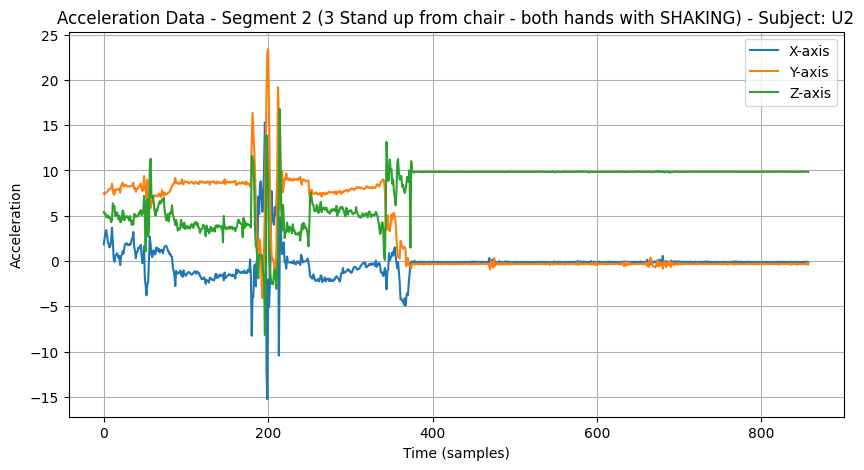

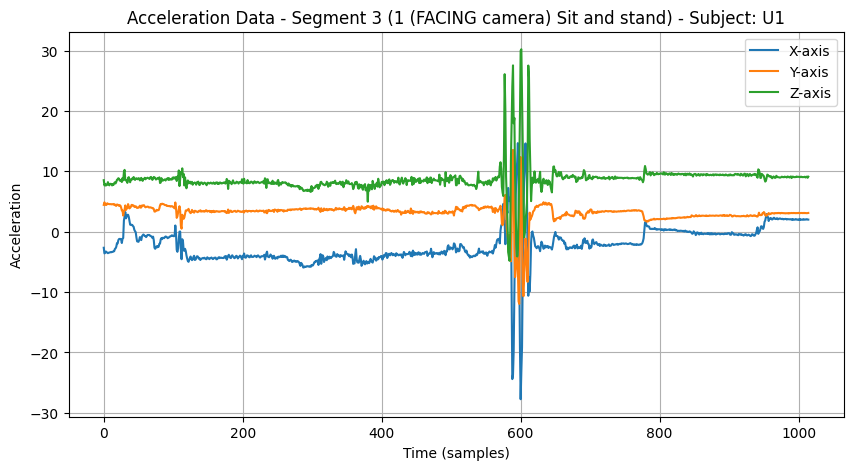

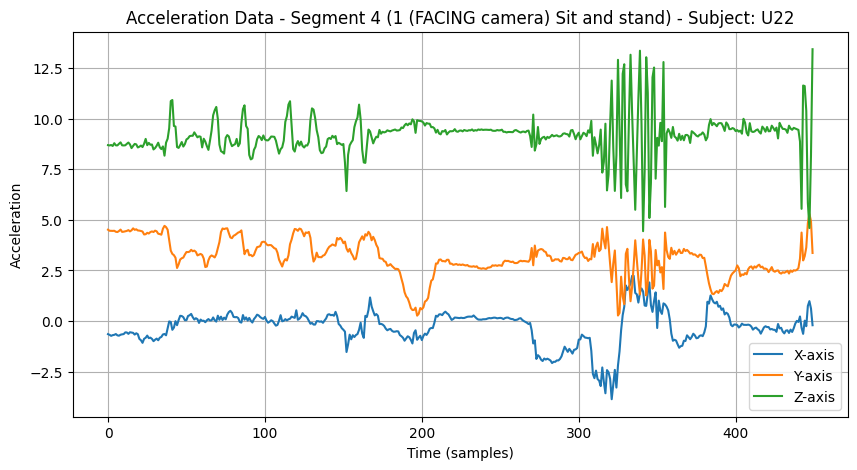

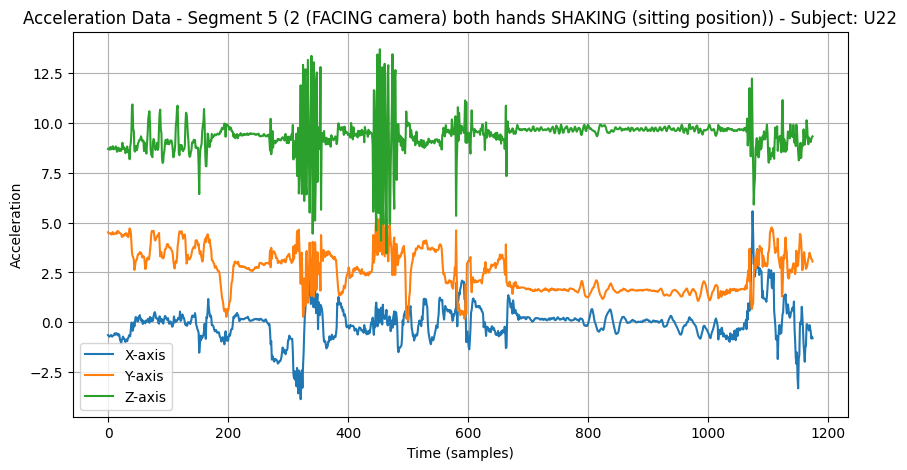

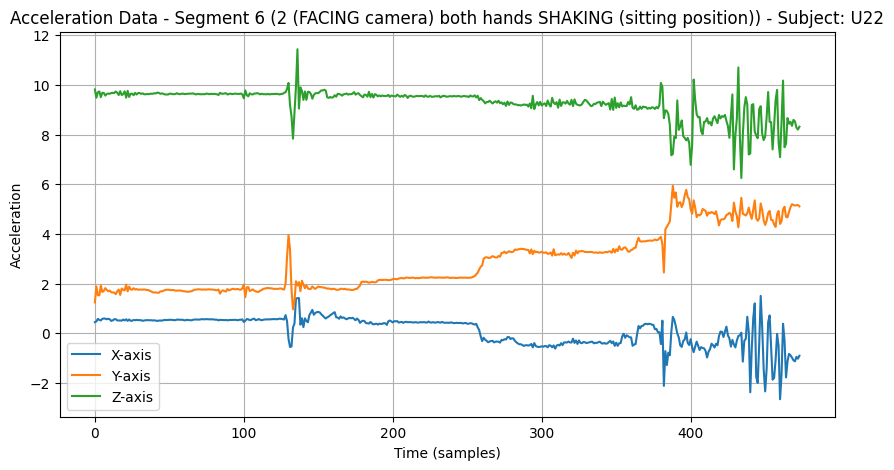

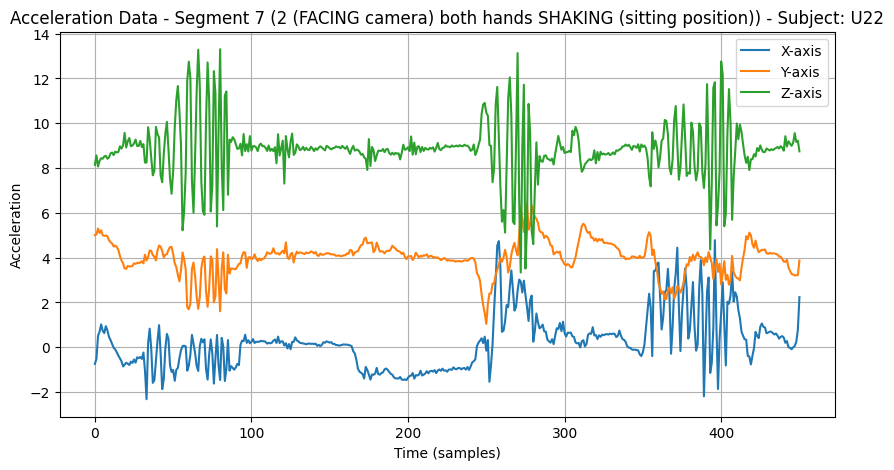

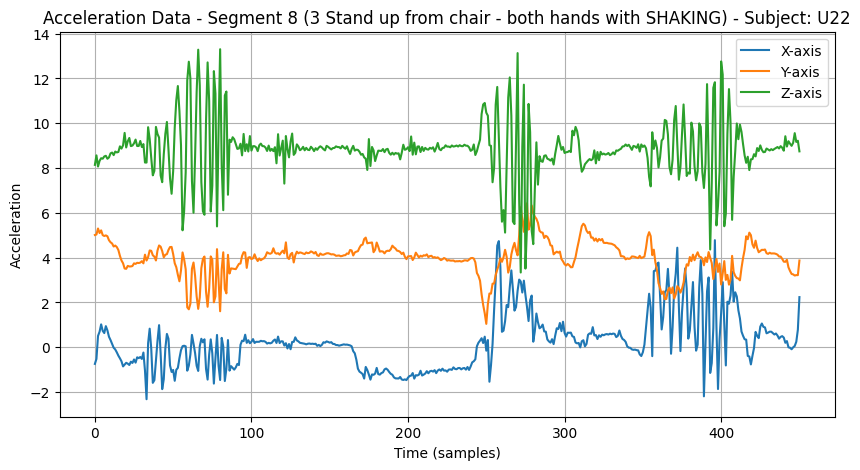

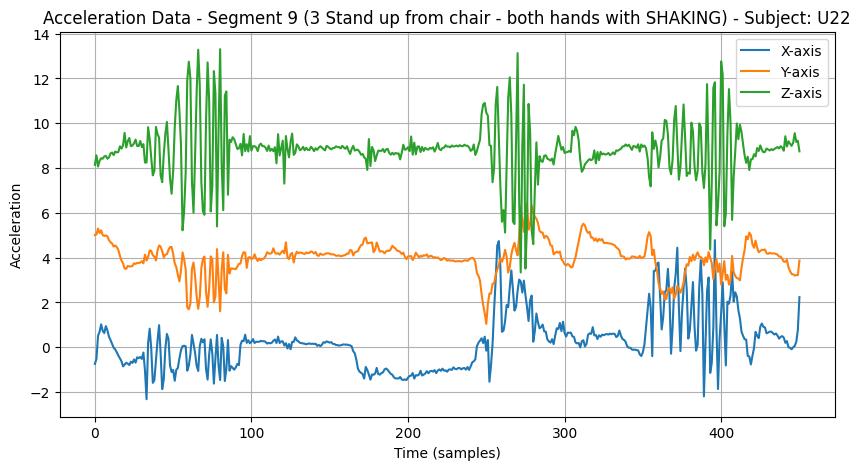

In [43]:
for i in range(2, 10):
    plot_segment(i)

In [47]:
type(seg_list[0])
types = [type(seg) for seg in seg_list]
print(set(types))

{<class 'pandas.core.frame.DataFrame'>}


In [48]:
set(seg_label_list)

{'1 (FACING camera) Sit and stand',
 '10 Slow walk (SHAKING hands/body, tiny step, head forward)',
 '2 (FACING camera) both hands SHAKING (sitting position)',
 '3 Stand up from chair - both hands with SHAKING',
 '4 (Sideway) Sit & stand',
 '5 (Sideway) both hands SHAKING (sitting)',
 '6 (Sideway) STAND up with - both hands SHAKING',
 '7 Cool down - sitting/relax',
 '8 Walk (LEFT --> Right --> Left)',
 '9 Walk & STOP/frozen, full body shaking, rotate then return back'}

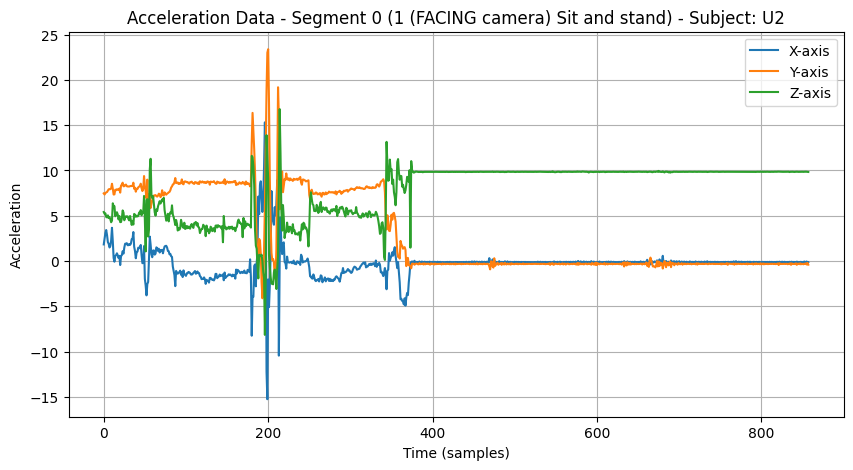

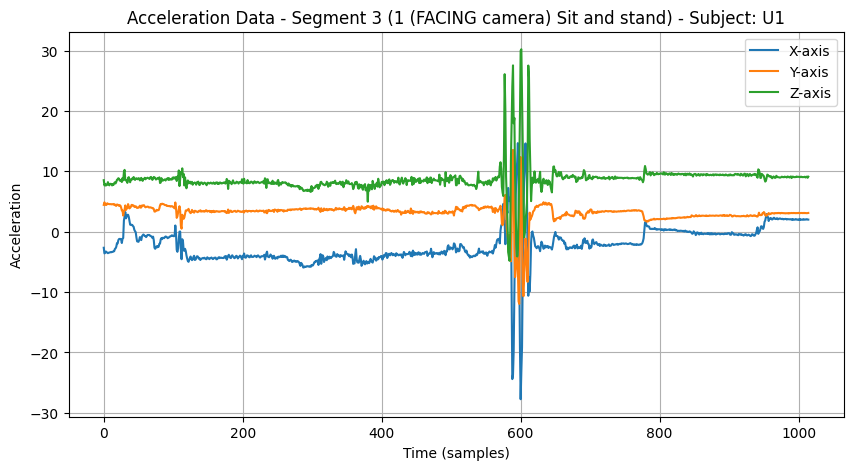

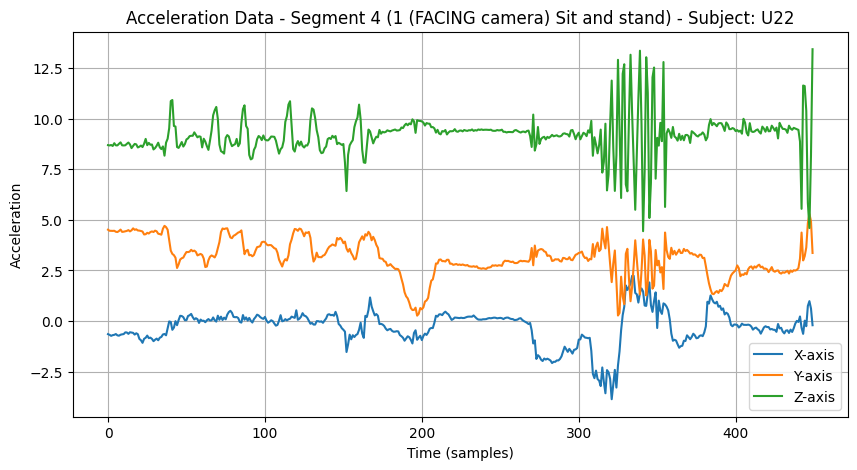

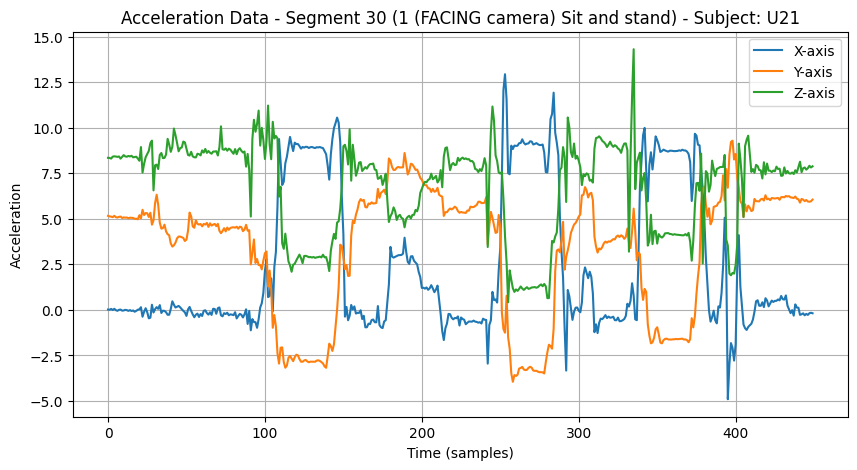

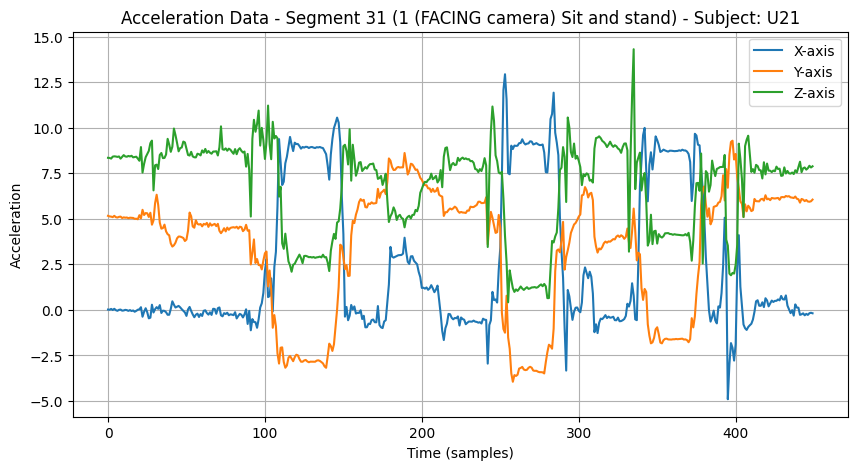

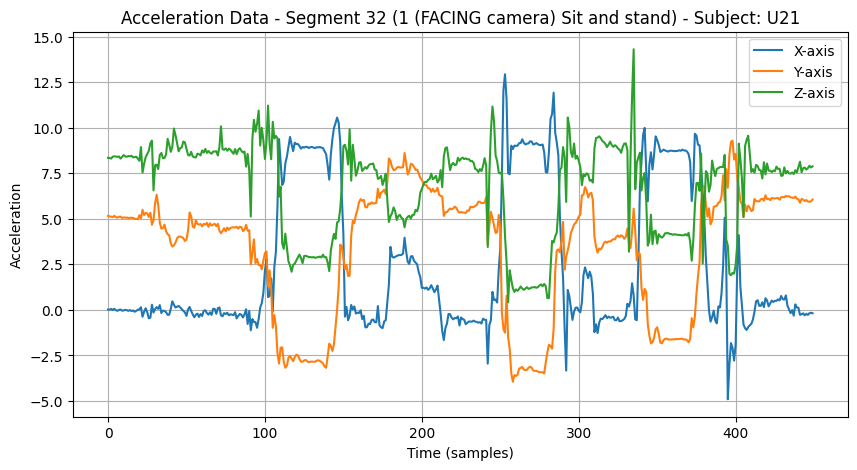

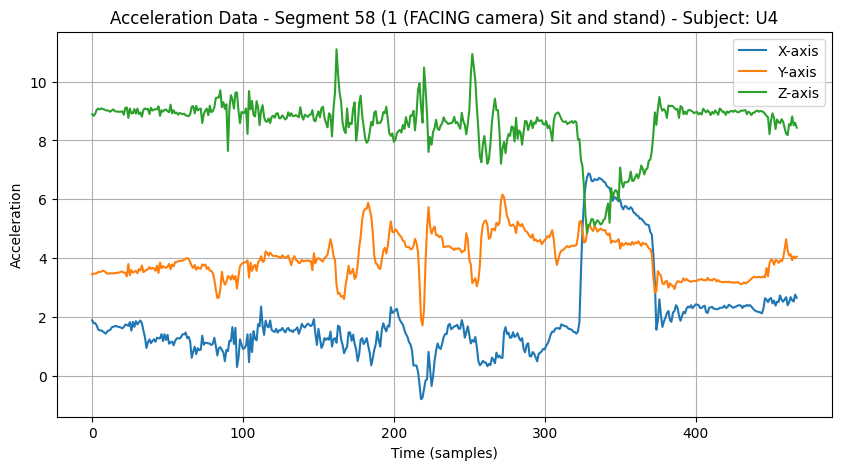

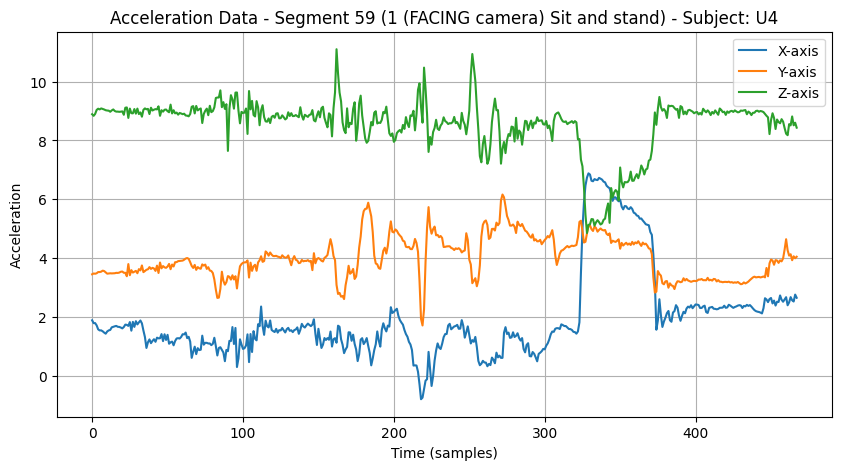

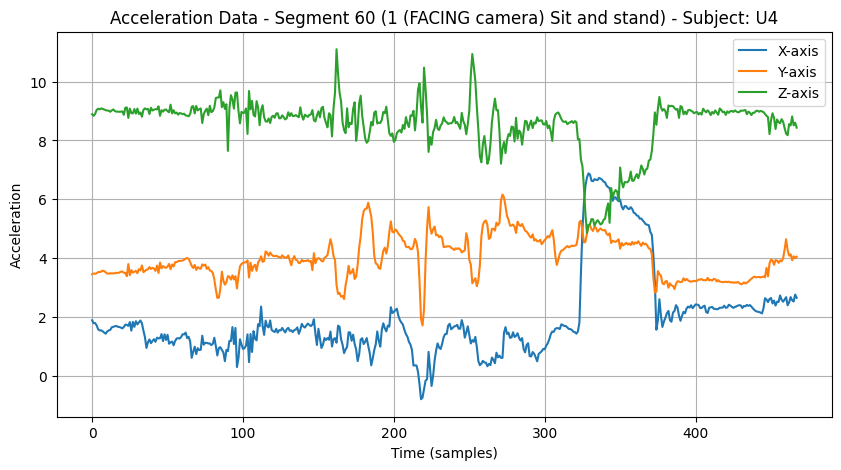

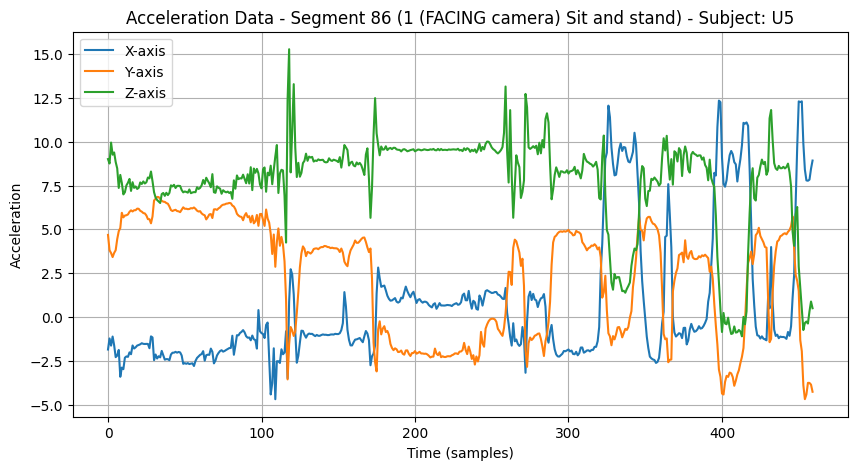

In [50]:
for label in ['1 (FACING camera) Sit and stand']:
    indices = [i for i, x in enumerate(seg_label_list) if x == label]
    for i in indices[:10]:
        plot_segment(i)